<a href="https://colab.research.google.com/github/shintaaulia/proses-stokastik/blob/main/stokastik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import networkx.drawing.nx_pydot as gl
import networkx as nx
from pprint import pprint
%matplotlib inline
plt.style.use('seaborn')

In [ ]:
db = pd.read_csv('https://raw.githubusercontent.com/shintaaulia/proses-stokastik/main/Data%20gabungan%204.csv')
db

,Tahun,Kuadrimester,CurahHujan,Temperatur,Kelembapan,KecepatanAngin,PenyinaranMatahari,Wisatawan
0,2016,1,6.95,28.55,79.82,2.56,7.82,2222243
1,2016,2,5.05,27.52,80.79,3.11,8.53,3472965
2,2016,3,10.19,28.06,80.77,3.12,7.22,2948472
3,2017,1,8.69,27.41,80.81,3.21,6.73,2503314
4,2017,2,2.07,19.66,60.09,2.92,5.87,2986876
5,2017,3,9.46,27.01,80.48,2.94,6.74,3245443
6,2018,1,9.35,27.76,80.99,3.39,7.57,2939084
7,2018,2,1.08,26.55,78.94,3.91,8.31,3515383
8,2018,3,3.46,27.57,79.62,2.81,8.58,3303524
9,2019,1,7.25,27.95,83.68,3.18,7.33,3069253


# CURAH HUJAN

In [ ]:
X = db['CurahHujan']
Y = db['Wisatawan']
S = np.zeros(14)
for i in range (0,14):
  S[i] = X[i+1]-X[i]
print(S)

[-1.9   5.14 -1.5  -6.62  7.39 -0.11 -8.27  2.38  3.79 -6.72  0.43  5.6
 -4.78  3.01]


In [ ]:
Z = np.zeros(14)
for i in range (0,14):
  Z[i] = Y[i+1] - Y[i]
print(Z)

[ 1250722.  -524493.  -445158.   483562.   258567.  -306359.   576299.
  -211859.  -234271.   735996.  -134712. -1327158. -1519192.   604404.]


In [ ]:
#interval Wisatawan

for var in Z :
  if var > -1519193 and var <= -965210:
    print ('S1')
  elif var > -965210 and var <= -411227:
    print ('S2')
  elif var > -411227 and var <= 142756:
    print ('S3')
  elif var > 142756 and var <= 696739:
    print ('S4')
  elif var > 696739 and var <= 1250722:
    print ('S5')
  else :
    print ('not valid')

S5
S2
S2
S4
S4
S3
S4
S3
S3
S5
S3
S1
S1
S4


In [ ]:
 import pandas as pd
transitions = [ 'S5','S2','S2','S4','S4','S3','S4','S3','S3','S5','S3',
               'S1','S1','S4'] * 2

In [ ]:
df = pd.DataFrame (columns = [ 'state', 'next_state'])
for i , val in enumerate(transitions[ : -1 ] ) :
  df_stg = pd.DataFrame ( index =[0] )
  df_stg [ 'state' ], df_stg [ 'next_state'] = transitions [i] ,transitions [i+1]

df = pd.concat ([ df, df_stg ] , axis = 0 )
cross_tab = pd.crosstab( df['state'] , df['next_state'])
cross_tab.div ( cross_tab.sum(axis=1) , axis=0)

next_state,S4
state,
S1,1.0


In [ ]:
for var in S :
  if var > -8.3 and var <= -5.1:
    print ( 'O1')
  elif var > -5.1 and var <= -1.9 :
    print ( 'O2' )
  elif var > -1.9 and var <= 1.3:
    print ( 'O3' )
  elif var > 1.3 and var <= 4.5:
    print ( 'O4' )
  elif var > 4.5 and var <= 7.7:
    print ( 'O5' )
  else :
    print ( 'not valid ' )

O2
O5
O3
O1
O5
O3
O1
O4
O4
O1
O3
O5
O2
O4


In [ ]:
#probabilitas transisi variable terobservasi
import pandas as pd
transitions = ['O2','O5' , 'O3' , 'O1' , 'O5' , 'O3' , 'O1' , 'O4' ,
'O4' , 'O1' , 'O3' , 'O5' , 'O2' , 'O4' ] * 2


In [ ]:
df = pd.DataFrame (columns = [ 'state', 'next_state'])
for i , val in enumerate(transitions[ : -1 ] ) :
  df_stg = pd.DataFrame ( index =[0] )
  df_stg [ 'state' ], df_stg [ 'next_state'] = transitions [i] ,transitions [i+1]

df = pd.concat ([ df, df_stg ] , axis = 0 )
cross_tab = pd.crosstab( df['state'] , df['next_state'])
cross_tab.div ( cross_tab.sum(axis=1) , axis=0)

next_state,O4
state,
O2,1.0


In [ ]:
#prediksi pola variabel terhadap panen

#create state space and initial state probabilies
states = [ 'O1', 'O2' , 'O3' , 'O4', 'O5']
pi = [ 2/14 , 2/14 , 4/14, 4/14 , 2/14 ]
state_space = pd.Series ( pi , index = states , name='states' )
print ( state_space)
print ( state_space.sum( ) )


O1    0.142857
O2    0.142857
O3    0.285714
O4    0.285714
O5    0.142857
Name: states, dtype: float64
1.0


In [ ]:
#create transition matrix
#equals transition probability matrix of changing state given a state
#matrix is size (M x M) where M is number of states

#probabilitas transisi variabel terobervasi

q_df = pd.DataFrame ( columns=states , index=states )
q_df.loc[ states[0] ] = [ 0.0  , 0.0 , 0.33 , 0.33 , 0.33 ]
q_df.loc[ states[1] ] = [ 0.0  , 0.0 , 0.0  , 0.5  , 0.5  ]
q_df.loc[ states[2] ] = [ 0.67 , 0.0 , 0.0  , 0.0  , 0.33 ]
q_df.loc[ states[3] ] = [ 0.5  , 0.0 , 0.0  , 0.5  , 0.0  ]
q_df.loc[ states[4] ] = [ 0.0  , 0.33, 0.67 , 0.0  , 0.0  ]
print ( q_df )


      O1    O2    O3    O4    O5
O1     0     0  0.33  0.33  0.33
O2     0     0     0   0.5   0.5
O3  0.67     0     0     0  0.33
O4   0.5     0     0   0.5     0
O5     0  0.33  0.67     0     0


In [ ]:
from pprint import pprint 

# create a function that maps transition probability dataframe 
# to markov edges and weights

def _get_markov_edges(Q):
    edges = {}
    for col in Q.columns:
        for idx in Q.index:
            edges[(idx,col)] = Q.loc[idx,col]
    return edges

edges_wts = _get_markov_edges(q_df)
pprint(edges_wts)

{('O1', 'O1'): 0.0,
 ('O1', 'O2'): 0.0,
 ('O1', 'O3'): 0.33,
 ('O1', 'O4'): 0.33,
 ('O1', 'O5'): 0.33,
 ('O2', 'O1'): 0.0,
 ('O2', 'O2'): 0.0,
 ('O2', 'O3'): 0.0,
 ('O2', 'O4'): 0.5,
 ('O2', 'O5'): 0.5,
 ('O3', 'O1'): 0.67,
 ('O3', 'O2'): 0.0,
 ('O3', 'O3'): 0.0,
 ('O3', 'O4'): 0.0,
 ('O3', 'O5'): 0.33,
 ('O4', 'O1'): 0.5,
 ('O4', 'O2'): 0.0,
 ('O4', 'O3'): 0.0,
 ('O4', 'O4'): 0.5,
 ('O4', 'O5'): 0.0,
 ('O5', 'O1'): 0.0,
 ('O5', 'O2'): 0.33,
 ('O5', 'O3'): 0.67,
 ('O5', 'O4'): 0.0,
 ('O5', 'O5'): 0.0}


Nodes:
['O1', 'O2', 'O3', 'O4', 'O5']

Edges:
OutMultiEdgeDataView([('O1', 'O1', {'weight': 0.0, 'label': 0.0}), ('O1', 'O2', {'weight': 0.0, 'label': 0.0}), ('O1', 'O3', {'weight': 0.33, 'label': 0.33}), ('O1', 'O4', {'weight': 0.33, 'label': 0.33}), ('O1', 'O5', {'weight': 0.33, 'label': 0.33}), ('O2', 'O1', {'weight': 0.0, 'label': 0.0}), ('O2', 'O2', {'weight': 0.0, 'label': 0.0}), ('O2', 'O3', {'weight': 0.0, 'label': 0.0}), ('O2', 'O4', {'weight': 0.5, 'label': 0.5}), ('O2', 'O5', {'weight': 0.5, 'label': 0.5}), ('O3', 'O1', {'weight': 0.67, 'label': 0.67}), ('O3', 'O2', {'weight': 0.0, 'label': 0.0}), ('O3', 'O3', {'weight': 0.0, 'label': 0.0}), ('O3', 'O4', {'weight': 0.0, 'label': 0.0}), ('O3', 'O5', {'weight': 0.33, 'label': 0.33}), ('O4', 'O1', {'weight': 0.5, 'label': 0.5}), ('O4', 'O2', {'weight': 0.0, 'label': 0.0}), ('O4', 'O3', {'weight': 0.0, 'label': 0.0}), ('O4', 'O4', {'weight': 0.5, 'label': 0.5}), ('O4', 'O5', {'weight': 0.0, 'label': 0.0}), ('O5', 'O1', {'weight'

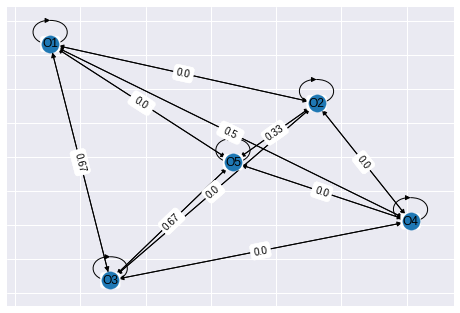

In [ ]:
# create graph object
G = nx.MultiDiGraph()

# nodes correspond to states
G.add_nodes_from(states)
print(f'Nodes:\n{G.nodes()}\n')

# edges represent transition probabilities
for k, v in edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
print(f'Edges:')
pprint(G.edges(data=True))    

pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='dot')
nx.draw_networkx(G, pos)

# create edge labels for jupyter plot but is not necessary
edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G , pos, edge_labels=edge_labels)
nx.drawing.nx_pydot.write_dot(G, 'pet_dog_markov.dot')

In [ ]:
#create state space and initial state probabilities
hidden_states = [ 'S1' , 'S2' , 'S3' , 'S4', 'S5']
pi = [ 2/14 , 2/14 , 4/14, 4/14 , 2/14 ]
print ( '\n' )
state_space = pd.Series ( pi , index = hidden_states , name='states')
print (state_space)
print('\n')
print(state_space.sum())



S1    0.142857
S2    0.142857
S3    0.285714
S4    0.285714
S5    0.142857
Name: states, dtype: float64


1.0


In [ ]:
#create hidden transition matrix
#a or alpha = transition probability matrix of changing states given a state
#matrix is size (M x M) where M is number of states

a_df = pd.DataFrame(columns = hidden_states , index=hidden_states )
a_df.loc[ hidden_states[ 0 ] ] = [ 0.5 , 0.0 , 0.0 , 0.5 , 0.0 ]
a_df.loc[ hidden_states[ 1 ] ] = [ 0.0 , 0.5 , 0.0 , 0.5 , 0.0 ]
a_df.loc[ hidden_states[ 2 ] ] = [ 0.25 , 0.0 , 0.25 , 0.25, 0.25 ]
a_df.loc[ hidden_states[ 3 ] ] = [ 0.0 , 0.0 , 0.67 , 0.33 , 0.0 ]
a_df.loc[ hidden_states[ 4 ] ] = [ 0.0 , 0.5 , 0.5 , 0.0 , 0.0 ]
print ( a_df )


      S1   S2    S3    S4    S5
S1   0.5    0     0   0.5     0
S2     0  0.5     0   0.5     0
S3  0.25    0  0.25  0.25  0.25
S4     0    0  0.67  0.33     0
S5     0  0.5   0.5     0     0


In [ ]:
a = a_df.values
print ( a )
print ( '\n')
print ( a.shape )
print ( '\n ')
print ( a_df.sum( axis = 1))


[[0.5 0.0 0.0 0.5 0.0]
 [0.0 0.5 0.0 0.5 0.0]
 [0.25 0.0 0.25 0.25 0.25]
 [0.0 0.0 0.67 0.33 0.0]
 [0.0 0.5 0.5 0.0 0.0]]


(5, 5)

 
S1    1.0
S2    1.0
S3    1.0
S4    1.0
S5    1.0
dtype: float64


In [ ]:
#create matrix of observation (emission) probabilities
#b or beta = observation probabilities given state
#matrix is size (M x O) where M is number of states
# and O is number of different possible observations

observable_states = states
b_df = pd.DataFrame(columns = observable_states , index = hidden_states)
b_df.loc[ hidden_states[ 0 ] ] = [ 0.0 , 0.5 , 0.0 , 0.0 , 0.5 ]
b_df.loc[ hidden_states[ 1 ] ] = [ 0.0 , 0.0 , 0.5 , 0.0 , 0.5 ]
b_df.loc[ hidden_states[ 2 ] ] = [ 0.0 , 0.0 , 0.5 , 0.5 , 0.0 ]
b_df.loc[ hidden_states[ 3 ] ] = [ 0.5 , 0.0 , 0.0 , 0.25 , 0.25 ]
b_df.loc[ hidden_states[ 4 ] ] = [ 0.5 , 0.5 , 0.0 , 0.00 , 0.0 ]
print ( b_df )


     O1   O2   O3    O4    O5
S1    0  0.5    0     0   0.5
S2    0    0  0.5     0   0.5
S3    0    0  0.5   0.5     0
S4  0.5    0    0  0.25  0.25
S5  0.5  0.5    0     0     0


In [ ]:
b = b_df.values

print ( b )
print( '\n' )
print ( b.shape )
print ( '\n' )
print ( b_df.sum( axis = 1))


[[0.0 0.5 0.0 0.0 0.5]
 [0.0 0.0 0.5 0.0 0.5]
 [0.0 0.0 0.5 0.5 0.0]
 [0.5 0.0 0.0 0.25 0.25]
 [0.5 0.5 0.0 0.0 0.0]]


(5, 5)


S1    1.0
S2    1.0
S3    1.0
S4    1.0
S5    1.0
dtype: float64


In [ ]:
#create edge labels
#emit_edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data = True)}
#nx.draw_networkx_edge_labels(G, pos, edge_labels = emit_edge_labels)
#plt .show()
#nx.drawing.nx_pydot.write dot(G, 'hidden markov.dot')

# observation sequence of dog's behaviors 
# observations are encoded numerically

obs_map = {'O1':0, 'O2':1, 'O3':2, 'O4':3, 'O5':4}
obs = np.array([1, 4, 2, 0, 4, 2, 0, 3, 3, 0, 2, 4, 1, 3])

inv_obs_map = dict((v,k) for k, v in obs_map.items())
obs_seq = [inv_obs_map[v] for v in list(obs)]

print(pd.DataFrame(np.column_stack([obs, obs_seq]),
                   columns = ['Obs_code', 'Obs_seq']))



   Obs_code Obs_seq
0         1      O2
1         4      O5
2         2      O3
3         0      O1
4         4      O5
5         2      O3
6         0      O1
7         3      O4
8         3      O4
9         0      O1
10        2      O3
11        4      O5
12        1      O2
13        3      O4


In [ ]:
# create graph edges and weights

hide_edges_wts = _get_markov_edges(a_df)
pprint(hide_edges_wts)

emit_edges_wts = _get_markov_edges(b_df)
pprint(emit_edges_wts)

{('S1', 'S1'): 0.5,
 ('S1', 'S2'): 0.0,
 ('S1', 'S3'): 0.0,
 ('S1', 'S4'): 0.5,
 ('S1', 'S5'): 0.0,
 ('S2', 'S1'): 0.0,
 ('S2', 'S2'): 0.5,
 ('S2', 'S3'): 0.0,
 ('S2', 'S4'): 0.5,
 ('S2', 'S5'): 0.0,
 ('S3', 'S1'): 0.25,
 ('S3', 'S2'): 0.0,
 ('S3', 'S3'): 0.25,
 ('S3', 'S4'): 0.25,
 ('S3', 'S5'): 0.25,
 ('S4', 'S1'): 0.0,
 ('S4', 'S2'): 0.0,
 ('S4', 'S3'): 0.67,
 ('S4', 'S4'): 0.33,
 ('S4', 'S5'): 0.0,
 ('S5', 'S1'): 0.0,
 ('S5', 'S2'): 0.5,
 ('S5', 'S3'): 0.5,
 ('S5', 'S4'): 0.0,
 ('S5', 'S5'): 0.0}
{('S1', 'O1'): 0.0,
 ('S1', 'O2'): 0.5,
 ('S1', 'O3'): 0.0,
 ('S1', 'O4'): 0.0,
 ('S1', 'O5'): 0.5,
 ('S2', 'O1'): 0.0,
 ('S2', 'O2'): 0.0,
 ('S2', 'O3'): 0.5,
 ('S2', 'O4'): 0.0,
 ('S2', 'O5'): 0.5,
 ('S3', 'O1'): 0.0,
 ('S3', 'O2'): 0.0,
 ('S3', 'O3'): 0.5,
 ('S3', 'O4'): 0.5,
 ('S3', 'O5'): 0.0,
 ('S4', 'O1'): 0.5,
 ('S4', 'O2'): 0.0,
 ('S4', 'O3'): 0.0,
 ('S4', 'O4'): 0.25,
 ('S4', 'O5'): 0.25,
 ('S5', 'O1'): 0.5,
 ('S5', 'O2'): 0.5,
 ('S5', 'O3'): 0.0,
 ('S5', 'O4'): 0.0,
 ('S5', 'O5'

Nodes:
['S1', 'S2', 'S3', 'S4', 'S5']

Edges:
OutMultiEdgeDataView([('S1', 'S1', {'weight': 0.5, 'label': 0.5}), ('S1', 'S2', {'weight': 0.0, 'label': 0.0}), ('S1', 'S3', {'weight': 0.0, 'label': 0.0}), ('S1', 'S4', {'weight': 0.5, 'label': 0.5}), ('S1', 'S5', {'weight': 0.0, 'label': 0.0}), ('S1', 'O1', {'weight': 0.0, 'label': 0.0}), ('S1', 'O2', {'weight': 0.5, 'label': 0.5}), ('S1', 'O3', {'weight': 0.0, 'label': 0.0}), ('S1', 'O4', {'weight': 0.0, 'label': 0.0}), ('S1', 'O5', {'weight': 0.5, 'label': 0.5}), ('S2', 'S1', {'weight': 0.0, 'label': 0.0}), ('S2', 'S2', {'weight': 0.5, 'label': 0.5}), ('S2', 'S3', {'weight': 0.0, 'label': 0.0}), ('S2', 'S4', {'weight': 0.5, 'label': 0.5}), ('S2', 'S5', {'weight': 0.0, 'label': 0.0}), ('S2', 'O1', {'weight': 0.0, 'label': 0.0}), ('S2', 'O2', {'weight': 0.0, 'label': 0.0}), ('S2', 'O3', {'weight': 0.5, 'label': 0.5}), ('S2', 'O4', {'weight': 0.0, 'label': 0.0}), ('S2', 'O5', {'weight': 0.5, 'label': 0.5}), ('S3', 'S1', {'weight': 0.25, 'l

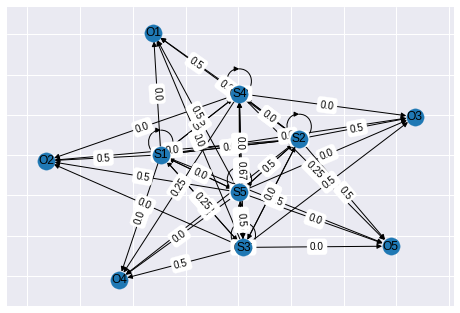

In [ ]:
# create graph object
G = nx.MultiDiGraph()

# nodes correspond to states
G.add_nodes_from(hidden_states)
print(f'Nodes:\n{G.nodes()}\n')

# edges represent hidden probabilities
for k, v in hide_edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)

# edges represent emission probabilities
for k, v in emit_edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
    
print(f'Edges:')
pprint(G.edges(data=True))    

pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='neato')
nx.draw_networkx(G, pos)

# create edge labels for jupyter plot but is not necessary
emit_edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G , pos, edge_labels=emit_edge_labels)
nx.drawing.nx_pydot.write_dot(G, 'pet_dog_hidden_markov.dot')

In [ ]:
def viterbi(pi, a, b, obs):
    
    nStates = np.shape(b)[0]
    T = np.shape(obs)[0]
    
    # init blank path
    path = np.zeros(T)
    # delta --> highest probability of any path that reaches state i
    delta = np.zeros((nStates, T))
    # phi --> argmax by time step for each state
    phi = np.zeros((nStates, T))
    
    # init delta and phi 
    delta[:, 0] = pi*b[:, obs[0]]
    phi[:, 0] = 0

    print('\nStart Walk Forward\n')    
    # the forward algorithm extension
    for t in range(1, T):
        for s in range(nStates):
            delta[s, t] = np.max(delta[:, t-1] * a[:, s]) * b[s, obs[t]] 
            phi[s, t] = np.argmax(delta[:, t-1] * a[:, s])
            print('s={s} and t={t}: phi[{s}, {t}] = {phi}'.format(s=s, t=t, phi=phi[s, t]))
    
    # find optimal path
    print('-'*50)
    print('Start Backtrace\n')
    path[T-1] = np.argmax(delta[:, T-1])
    #p('init path\n    t={} path[{}-1]={}\n'.format(T-1, T, path[T-1]))
    for t in range(T-2, -1, -1):
        #path[t] = phi[path[t+1], [t+1]]
        path[t] = phi[int(path[t+1]) , int(t+1)] 
        #p(' '*4 + 't={t}, path[{t}+1]={path}, [{t}+1]={i}'.format(t=t, path=path[t+1], i=[t+1]))
        print('path[{}] = {}'.format(t, path[t]))
        
    return path, delta, phi

path, delta, phi = viterbi(pi, a, b, obs)
print('\nsingle best state path: \n', path)
print('delta:\n', delta)
print('phi:\n', phi)


Start Walk Forward

s=0 and t=1: phi[0, 1] = 0.0
s=1 and t=1: phi[1, 1] = 4.0
s=2 and t=1: phi[2, 1] = 4.0
s=3 and t=1: phi[3, 1] = 0.0
s=4 and t=1: phi[4, 1] = 0.0
s=0 and t=2: phi[0, 2] = 0.0
s=1 and t=2: phi[1, 2] = 1.0
s=2 and t=2: phi[2, 2] = 3.0
s=3 and t=2: phi[3, 2] = 0.0
s=4 and t=2: phi[4, 2] = 0.0
s=0 and t=3: phi[0, 3] = 2.0
s=1 and t=3: phi[1, 3] = 1.0
s=2 and t=3: phi[2, 3] = 2.0
s=3 and t=3: phi[3, 3] = 1.0
s=4 and t=3: phi[4, 3] = 2.0
s=0 and t=4: phi[0, 4] = 0.0
s=1 and t=4: phi[1, 4] = 4.0
s=2 and t=4: phi[2, 4] = 3.0
s=3 and t=4: phi[3, 4] = 3.0
s=4 and t=4: phi[4, 4] = 0.0
s=0 and t=5: phi[0, 5] = 0.0
s=1 and t=5: phi[1, 5] = 1.0
s=2 and t=5: phi[2, 5] = 3.0
s=3 and t=5: phi[3, 5] = 1.0
s=4 and t=5: phi[4, 5] = 0.0
s=0 and t=6: phi[0, 6] = 2.0
s=1 and t=6: phi[1, 6] = 1.0
s=2 and t=6: phi[2, 6] = 2.0
s=3 and t=6: phi[3, 6] = 1.0
s=4 and t=6: phi[4, 6] = 2.0
s=0 and t=7: phi[0, 7] = 0.0
s=1 and t=7: phi[1, 7] = 4.0
s=2 and t=7: phi[2, 7] = 3.0
s=3 and t=7: phi[3, 7]

In [ ]:
state_map = {0:'S1', 1:'S2', 2:'S3', 3:'S4', 4:'S5'}
state_path = [state_map[v] for v in path]

(pd.DataFrame()
 .assign(Observation=obs_seq)
 .assign(Best_Path=state_path))

,Observation,Best_Path
0,O2,S1
1,O5,S4
2,O3,S3
3,O1,S5
4,O5,S2
5,O3,S2
6,O1,S4
7,O4,S3
8,O4,S3
9,O1,S4


# TEMPERATUR

In [ ]:
X = db['Temperatur']
Y = db['Wisatawan']
S = np.zeros(14)
for i in range (0,14):
  S[i] = X[i+1]-X[i]
print(S)

[-1.03  0.54 -0.65 -7.75  7.35  0.75 -1.21  1.02  0.38 -1.81  1.59  0.56
 -1.15  0.68]


In [ ]:
Z = np.zeros(14)
for i in range (0,14):
  Z[i] = Y[i+1] - Y[i]
print(Z)

[ 1250722.  -524493.  -445158.   483562.   258567.  -306359.   576299.
  -211859.  -234271.   735996.  -134712. -1327158. -1519192.   604404.]


In [ ]:
#interval Wisatawan

for var in Z :
  if var > -1519193 and var <= -965210:
    print ('S1')
  elif var > -965210 and var <= -411227:
    print ('S2')
  elif var > -411227 and var <= 142756:
    print ('S3')
  elif var > 142756 and var <= 696739:
    print ('S4')
  elif var > 696739 and var <= 1250722:
    print ('S5')
  else :
    print ('not valid')

S5
S2
S2
S4
S4
S3
S4
S3
S3
S5
S3
S1
S1
S4


In [ ]:
 import pandas as pd
transitions = [ 'S5','S2','S2','S4','S4','S3','S4','S3','S3','S5','S3',
               'S1','S1','S4'] * 2

In [ ]:
df = pd.DataFrame (columns = [ 'state', 'next_state'])
for i , val in enumerate(transitions[ : -1 ] ) :
  df_stg = pd.DataFrame ( index =[0] )
  df_stg [ 'state' ], df_stg [ 'next_state'] = transitions [i] ,transitions [i+1]

df = pd.concat ([ df, df_stg ] , axis = 0 )
cross_tab = pd.crosstab( df['state'] , df['next_state'])
cross_tab.div ( cross_tab.sum(axis=1) , axis=0)

next_state,S4
state,
S1,1.0


In [ ]:
for var in S :
  if var > -7.8 and var <= -4.7:
    print ( 'O1')
  elif var > -4.7 and var <= -1.6 :
    print ( 'O2' )
  elif var > -1.6 and var <= 1.5:
    print ( 'O3' )
  elif var > 1.5 and var <= 4.6:
    print ( 'O4' )
  elif var > 4.6 and var <= 7.7:
    print ( 'O5' )
  else :
    print ( 'not valid ' )

O3
O3
O3
O1
O5
O3
O3
O3
O3
O2
O4
O3
O3
O3


In [ ]:
#probabilitas transisi variable terobservasi
import pandas as pd
transitions = ['O3','O3' , 'O3' , 'O1' , 'O5' , 'O3' , 'O3' , 'O3' ,
'O3' , 'O2' , 'O4' , 'O3' , 'O3' , 'O3' ] * 2


In [ ]:
df = pd.DataFrame (columns = [ 'state', 'next_state'])
for i , val in enumerate(transitions[ : -1 ] ) :
  df_stg = pd.DataFrame ( index =[0] )
  df_stg [ 'state' ], df_stg [ 'next_state'] = transitions [i] ,transitions [i+1]

df = pd.concat ([ df, df_stg ] , axis = 0 )
cross_tab = pd.crosstab( df['state'] , df['next_state'])
cross_tab.div ( cross_tab.sum(axis=1) , axis=0)

next_state,O3
state,
O3,1.0


In [ ]:
#prediksi pola variabel terhadap panen

#create state space and initial state probabilies
states = [ 'O1', 'O2' , 'O3' , 'O4', 'O5']
pi = [ 2/14 , 2/14 , 4/14, 4/14 , 2/14 ]
state_space = pd.Series ( pi , index = states , name='states' )
print ( state_space)
print ( state_space.sum( ) )


O1    0.142857
O2    0.142857
O3    0.285714
O4    0.285714
O5    0.142857
Name: states, dtype: float64
1.0


In [ ]:
#create transition matrix
#equals transition probability matrix of changing state given a state
#matrix is size (M x M) where M is number of states

#probabilitas transisi variabel terobervasi

q_df = pd.DataFrame ( columns=states , index=states )
q_df.loc[ states[0] ] = [ 0.0  , 0.0 , 0.0 , 0.0 , 1.0 ]
q_df.loc[ states[1] ] = [ 0.0  , 0.0 , 0.0 , 1.0  , 0.0  ]
q_df.loc[ states[2] ] = [ 0.11 , 0.11 , 0.78 , 0.0 , 0.0 ]
q_df.loc[ states[3] ] = [ 0.0  , 0.0 , 1.0 , 0.0  , 0.0  ]
q_df.loc[ states[4] ] = [ 0.0  , 0.0, 1.0 , 0.0  , 0.0  ]
print ( q_df )


      O1    O2    O3 O4 O5
O1     0     0     0  0  1
O2     0     0     0  1  0
O3  0.11  0.11  0.78  0  0
O4     0     0     1  0  0
O5     0     0     1  0  0


In [ ]:
#create state space and initial state probabilities
hidden_states = [ 'S1' , 'S2' , 'S3' , 'S4', 'S5']
pi = [ 2/14 , 2/14 , 4/14, 4/14 , 2/14 ]
print ( '\n' )
state_space = pd.Series ( pi , index = hidden_states , name='states')
print (state_space)
print('\n')
print(state_space.sum())



S1    0.142857
S2    0.142857
S3    0.285714
S4    0.285714
S5    0.142857
Name: states, dtype: float64


1.0


In [ ]:
#create hidden transition matrix
#a or alpha = transition probability matrix of changing states given a state
#matrix is size (M x M) where M is number of states

a_df = pd.DataFrame(columns = hidden_states , index=hidden_states )
a_df.loc[ hidden_states[ 0 ] ] = [ 0.5 , 0.0 , 0.0 , 0.5 , 0.0 ]
a_df.loc[ hidden_states[ 1 ] ] = [ 0.0 , 0.5 , 0.0 , 0.5 , 0.0 ]
a_df.loc[ hidden_states[ 2 ] ] = [ 0.25 , 0.0 , 0.25 , 0.25, 0.25 ]
a_df.loc[ hidden_states[ 3 ] ] = [ 0.0 , 0.0 , 0.67 , 0.33 , 0.0 ]
a_df.loc[ hidden_states[ 4 ] ] = [ 0.0 , 0.5 , 0.5 , 0.0 , 0.0 ]
print ( a_df )


      S1   S2    S3    S4    S5
S1   0.5    0     0   0.5     0
S2     0  0.5     0   0.5     0
S3  0.25    0  0.25  0.25  0.25
S4     0    0  0.67  0.33     0
S5     0  0.5   0.5     0     0


In [ ]:
a = a_df.values
print ( a )
print ( '\n')
print ( a.shape )
print ( '\n ')
print ( a_df.sum( axis = 1))


[[0.5 0.0 0.0 0.5 0.0]
 [0.0 0.5 0.0 0.5 0.0]
 [0.25 0.0 0.25 0.25 0.25]
 [0.0 0.0 0.67 0.33 0.0]
 [0.0 0.5 0.5 0.0 0.0]]


(5, 5)

 
S1    1.0
S2    1.0
S3    1.0
S4    1.0
S5    1.0
dtype: float64


In [ ]:
#create matrix of observation (emission) probabilities
#b or beta = observation probabilities given state
#matrix is size (M x O) where M is number of states
# and O is number of different possible observations

observable_states = states
b_df = pd.DataFrame(columns = observable_states , index=hidden_states )
b_df.loc[ hidden_states[ 0 ] ] = [ 0.0 , 0.0 , 1.0 , 0.0 , 0.0 ]
b_df.loc[ hidden_states[ 1 ] ] = [ 0.0 , 0.0 , 1.0 , 0.0 , 0.0 ]
b_df.loc[ hidden_states[ 2 ] ] = [ 0.0 , 0.0 , 0.75 , 0.25 , 0.0 ]
b_df.loc[ hidden_states[ 3 ] ] = [ 0.25 , 0.0 , 0.5 , 0.0 , 0.25 ]
b_df.loc[ hidden_states[ 4 ] ] = [ 0.0 , 0.5 , 0.5 , 0.0 , 0.0 ]
print ( b_df )


      O1   O2    O3    O4    O5
S1     0    0     1     0     0
S2     0    0     1     0     0
S3     0    0  0.75  0.25     0
S4  0.25    0   0.5     0  0.25
S5     0  0.5   0.5     0     0


In [ ]:
b = b_df.values

print ( b )
print( '\n' )
print ( b.shape )
print ( '\n' )
print ( b_df.sum( axis = 1))


[[0.0 0.0 1.0 0.0 0.0]
 [0.0 0.0 1.0 0.0 0.0]
 [0.0 0.0 0.75 0.25 0.0]
 [0.25 0.0 0.5 0.0 0.25]
 [0.0 0.5 0.5 0.0 0.0]]


(5, 5)


S1    1.0
S2    1.0
S3    1.0
S4    1.0
S5    1.0
dtype: float64


In [ ]:
#create edge labels
#emit_edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data = True)}
#nx.draw_networkx_edge_labels(G, pos, edge_labels = emit_edge_labels)
#plt .show()
#nx.drawing.nx_pydot.write dot(G, 'hidden markov.dot')

# observation sequence of dog's behaviors 
# observations are encoded numerically

obs_map = {'O1':0, 'O2':1, 'O3':2, 'O4':3, 'O5':4}
obs = np.array([2, 2, 2, 0, 4, 2, 2, 2, 2, 1, 3, 2, 2, 2])

inv_obs_map = dict((v,k) for k, v in obs_map.items())
obs_seq = [inv_obs_map[v] for v in list(obs)]

print(pd.DataFrame(np.column_stack([obs, obs_seq]),
                   columns = ['Obs_code', 'Obs_seq']))



   Obs_code Obs_seq
0         2      O3
1         2      O3
2         2      O3
3         0      O1
4         4      O5
5         2      O3
6         2      O3
7         2      O3
8         2      O3
9         1      O2
10        3      O4
11        2      O3
12        2      O3
13        2      O3


Nodes:
['S1', 'S2', 'S3', 'S4', 'S5']

Edges:
OutMultiEdgeDataView([('S1', 'S1', {'weight': 0.5, 'label': 0.5}), ('S1', 'S2', {'weight': 0.0, 'label': 0.0}), ('S1', 'S3', {'weight': 0.0, 'label': 0.0}), ('S1', 'S4', {'weight': 0.5, 'label': 0.5}), ('S1', 'S5', {'weight': 0.0, 'label': 0.0}), ('S1', 'O1', {'weight': 0.0, 'label': 0.0}), ('S1', 'O2', {'weight': 0.5, 'label': 0.5}), ('S1', 'O3', {'weight': 0.0, 'label': 0.0}), ('S1', 'O4', {'weight': 0.0, 'label': 0.0}), ('S1', 'O5', {'weight': 0.5, 'label': 0.5}), ('S2', 'S1', {'weight': 0.0, 'label': 0.0}), ('S2', 'S2', {'weight': 0.5, 'label': 0.5}), ('S2', 'S3', {'weight': 0.0, 'label': 0.0}), ('S2', 'S4', {'weight': 0.5, 'label': 0.5}), ('S2', 'S5', {'weight': 0.0, 'label': 0.0}), ('S2', 'O1', {'weight': 0.0, 'label': 0.0}), ('S2', 'O2', {'weight': 0.0, 'label': 0.0}), ('S2', 'O3', {'weight': 0.5, 'label': 0.5}), ('S2', 'O4', {'weight': 0.0, 'label': 0.0}), ('S2', 'O5', {'weight': 0.5, 'label': 0.5}), ('S3', 'S1', {'weight': 0.25, 'l

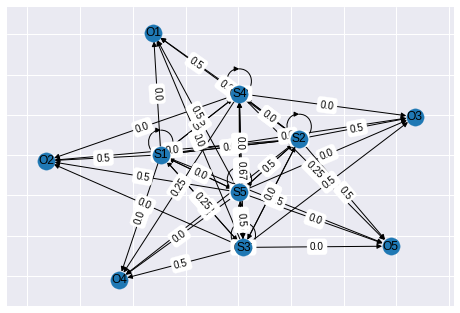

In [ ]:
# create graph object
G = nx.MultiDiGraph()

# nodes correspond to states
G.add_nodes_from(hidden_states)
print(f'Nodes:\n{G.nodes()}\n')

# edges represent hidden probabilities
for k, v in hide_edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)

# edges represent emission probabilities
for k, v in emit_edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
    
print(f'Edges:')
pprint(G.edges(data=True))    

pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='neato')
nx.draw_networkx(G, pos)

# create edge labels for jupyter plot but is not necessary
emit_edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G , pos, edge_labels=emit_edge_labels)
nx.drawing.nx_pydot.write_dot(G, 'pet_dog_hidden_markov.dot')

In [ ]:
def viterbi(pi, a, b, obs):
    
    nStates = np.shape(b)[0]
    T = np.shape(obs)[0]
    
    # init blank path
    path = np.zeros(T)
    # delta --> highest probability of any path that reaches state i
    delta = np.zeros((nStates, T))
    # phi --> argmax by time step for each state
    phi = np.zeros((nStates, T))
    
    # init delta and phi 
    delta[:, 0] = pi*b[:, obs[0]]
    phi[:, 0] = 0

    print('\nStart Walk Forward\n')    
    # the forward algorithm extension
    for t in range(1, T):
        for s in range(nStates):
            delta[s, t] = np.max(delta[:, t-1] * a[:, s]) * b[s, obs[t]] 
            phi[s, t] = np.argmax(delta[:, t-1] * a[:, s])
            print('s={s} and t={t}: phi[{s}, {t}] = {phi}'.format(s=s, t=t, phi=phi[s, t]))
    
    # find optimal path
    print('-'*50)
    print('Start Backtrace\n')
    path[T-1] = np.argmax(delta[:, T-1])
    #p('init path\n    t={} path[{}-1]={}\n'.format(T-1, T, path[T-1]))
    for t in range(T-2, -1, -1):
        #path[t] = phi[path[t+1], [t+1]]
        path[t] = phi[int(path[t+1]) , int(t+1)] 
        #p(' '*4 + 't={t}, path[{t}+1]={path}, [{t}+1]={i}'.format(t=t, path=path[t+1], i=[t+1]))
        print('path[{}] = {}'.format(t, path[t]))
        
    return path, delta, phi

path, delta, phi = viterbi(pi, a, b, obs)
print('\nsingle best state path: \n', path)
print('delta:\n', delta)
print('phi:\n', phi)


Start Walk Forward

s=0 and t=1: phi[0, 1] = 0.0
s=1 and t=1: phi[1, 1] = 1.0
s=2 and t=1: phi[2, 1] = 3.0
s=3 and t=1: phi[3, 1] = 0.0
s=4 and t=1: phi[4, 1] = 2.0
s=0 and t=2: phi[0, 2] = 0.0
s=1 and t=2: phi[1, 2] = 1.0
s=2 and t=2: phi[2, 2] = 3.0
s=3 and t=2: phi[3, 2] = 0.0
s=4 and t=2: phi[4, 2] = 2.0
s=0 and t=3: phi[0, 3] = 0.0
s=1 and t=3: phi[1, 3] = 1.0
s=2 and t=3: phi[2, 3] = 3.0
s=3 and t=3: phi[3, 3] = 0.0
s=4 and t=3: phi[4, 3] = 2.0
s=0 and t=4: phi[0, 4] = 0.0
s=1 and t=4: phi[1, 4] = 0.0
s=2 and t=4: phi[2, 4] = 3.0
s=3 and t=4: phi[3, 4] = 3.0
s=4 and t=4: phi[4, 4] = 0.0
s=0 and t=5: phi[0, 5] = 0.0
s=1 and t=5: phi[1, 5] = 0.0
s=2 and t=5: phi[2, 5] = 3.0
s=3 and t=5: phi[3, 5] = 3.0
s=4 and t=5: phi[4, 5] = 0.0
s=0 and t=6: phi[0, 6] = 2.0
s=1 and t=6: phi[1, 6] = 0.0
s=2 and t=6: phi[2, 6] = 2.0
s=3 and t=6: phi[3, 6] = 2.0
s=4 and t=6: phi[4, 6] = 2.0
s=0 and t=7: phi[0, 7] = 0.0
s=1 and t=7: phi[1, 7] = 4.0
s=2 and t=7: phi[2, 7] = 3.0
s=3 and t=7: phi[3, 7]

In [ ]:
state_map = {0:'S1', 1:'S2', 2:'S3', 3:'S4', 4:'S5'}
state_path = [state_map[v] for v in path]

(pd.DataFrame()
 .assign(Observation=obs_seq)
 .assign(Best_Path=state_path))

,Observation,Best_Path
0,O3,S1
1,O3,S1
2,O3,S1
3,O1,S4
4,O5,S4
5,O3,S3
6,O3,S1
7,O3,S4
8,O3,S3
9,O2,S5


# KELEMBABAN

In [ ]:
X = db['Kelembapan']
Y = db['Wisatawan']
S = np.zeros(14)
for i in range (0,14):
  S[i] = X[i+1]-X[i]
print(S)

[ 9.700e-01 -2.000e-02  4.000e-02 -2.072e+01  2.039e+01  5.100e-01
 -2.050e+00  6.800e-01  4.060e+00 -5.500e+00 -1.800e+00  3.630e+00
  7.600e-01 -9.900e-01]


In [ ]:
Z = np.zeros(14)
for i in range (0,14):
  Z[i] = Y[i+1] - Y[i]
print(Z)

[ 1250722.  -524493.  -445158.   483562.   258567.  -306359.   576299.
  -211859.  -234271.   735996.  -134712. -1327158. -1519192.   604404.]


In [ ]:
#interval Wisatawan

for var in Z :
  if var > -1519193 and var <= -965210:
    print ('S1')
  elif var > -965210 and var <= -411227:
    print ('S2')
  elif var > -411227 and var <= 142756:
    print ('S3')
  elif var > 142756 and var <= 696739:
    print ('S4')
  elif var > 696739 and var <= 1250722:
    print ('S5')
  else :
    print ('not valid')

S5
S2
S2
S4
S4
S3
S4
S3
S3
S5
S3
S1
S1
S4


In [ ]:
 import pandas as pd
transitions = [ 'S5','S2','S2','S4','S4','S3','S4','S3','S3','S5','S3',
               'S1','S1','S4'] * 2

In [ ]:
df = pd.DataFrame (columns = [ 'state', 'next_state'])
for i , val in enumerate(transitions[ : -1 ] ) :
  df_stg = pd.DataFrame ( index =[0] )
  df_stg [ 'state' ], df_stg [ 'next_state'] = transitions [i] ,transitions [i+1]

df = pd.concat ([ df, df_stg ] , axis = 0 )
cross_tab = pd.crosstab( df['state'] , df['next_state'])
cross_tab.div ( cross_tab.sum(axis=1) , axis=0)

next_state,S4
state,
S1,1.0


In [ ]:
for var in S :
  if var > -21 and var <= -12.5:
    print ( 'O1')
  elif var > -12.5 and var <= -4 :
    print ( 'O2' )
  elif var > -4 and var <= 4.5:
    print ( 'O3' )
  elif var > 4.5 and var <= 13:
    print ( 'O4' )
  elif var > 13 and var <= 21.5:
    print ( 'O5' )
  else :
    print ( 'not valid ' )

O3
O3
O3
O1
O5
O3
O3
O3
O3
O2
O3
O3
O3
O3


In [ ]:
#probabilitas transisi variable terobservasi
import pandas as pd
transitions = ['O3','O3' , 'O3' , 'O1' , 'O5' , 'O3' , 'O3' , 'O3' ,
'O3' , 'O2' , 'O3' , 'O3' , 'O3' , 'O3' ] * 2


In [ ]:
df = pd.DataFrame (columns = [ 'state', 'next_state'])
for i , val in enumerate(transitions[ : -1 ] ) :
  df_stg = pd.DataFrame ( index =[0] )
  df_stg [ 'state' ], df_stg [ 'next_state'] = transitions [i] ,transitions [i+1]

df = pd.concat ([ df, df_stg ] , axis = 0 )
cross_tab = pd.crosstab( df['state'] , df['next_state'])
cross_tab.div ( cross_tab.sum(axis=1) , axis=0)

next_state,O3
state,
O3,1.0


In [ ]:
#prediksi pola variabel terhadap panen

#create state space and initial state probabilies
states = [ 'O1', 'O2' , 'O3' , 'O4', 'O5']
pi = [ 2/14 , 2/14 , 4/14, 4/14 , 2/14 ]
state_space = pd.Series ( pi , index = states , name='states' )
print ( state_space)
print ( state_space.sum( ) )


O1    0.142857
O2    0.142857
O3    0.285714
O4    0.285714
O5    0.142857
Name: states, dtype: float64
1.0


In [ ]:
#create transition matrix
#equals transition probability matrix of changing state given a state
#matrix is size (M x M) where M is number of states

#probabilitas transisi variabel terobervasi

q_df = pd.DataFrame ( columns=states , index=states )
q_df.loc[ states[0] ] = [ 0.0  , 0.0 , 0.0 , 0.0 , 1.0 ]
q_df.loc[ states[1] ] = [ 0.0  , 0.0 , 1.0 , 0.0  , 0.0  ]
q_df.loc[ states[2] ] = [ 0.1 , 0.1 , 0.8 , 0.0  , 0.0 ]
q_df.loc[ states[3] ] = [ 0.0  , 0.0 , 0.0  , 0.0  , 0.0  ]
q_df.loc[ states[4] ] = [ 0.0  , 0.0, 1.0 , 0.0  , 0.0  ]
print ( q_df )


     O1   O2   O3 O4 O5
O1    0    0    0  0  1
O2    0    0    1  0  0
O3  0.1  0.1  0.8  0  0
O4    0    0    0  0  0
O5    0    0    1  0  0


In [ ]:
#create state space and initial state probabilities
hidden_states = [ 'S1' , 'S2' , 'S3' , 'S4', 'S5']
pi = [ 2/14 , 2/14 , 4/14, 4/14 , 2/14 ]
print ( '\n' )
state_space = pd.Series ( pi , index = hidden_states , name='states')
print (state_space)
print('\n')
print(state_space.sum())



S1    0.142857
S2    0.142857
S3    0.285714
S4    0.285714
S5    0.142857
Name: states, dtype: float64


1.0


In [ ]:
#create hidden transition matrix
#a or alpha = transition probability matrix of changing states given a state
#matrix is size (M x M) where M is number of states

a_df = pd.DataFrame(columns = hidden_states , index=hidden_states )
a_df.loc[ hidden_states[ 0 ] ] = [ 0.5 , 0.0 , 0.0 , 0.5 , 0.0 ]
a_df.loc[ hidden_states[ 1 ] ] = [ 0.0 , 0.5 , 0.0 , 0.5 , 0.0 ]
a_df.loc[ hidden_states[ 2 ] ] = [ 0.25 , 0.0 , 0.25 , 0.25, 0.25 ]
a_df.loc[ hidden_states[ 3 ] ] = [ 0.0 , 0.0 , 0.67 , 0.33 , 0.0 ]
a_df.loc[ hidden_states[ 4 ] ] = [ 0.0 , 0.5 , 0.5 , 0.0 , 0.0 ]
print ( a_df )


      S1   S2    S3    S4    S5
S1   0.5    0     0   0.5     0
S2     0  0.5     0   0.5     0
S3  0.25    0  0.25  0.25  0.25
S4     0    0  0.67  0.33     0
S5     0  0.5   0.5     0     0


In [ ]:
a = a_df.values
print ( a )
print ( '\n')
print ( a.shape )
print ( '\n ')
print ( a_df.sum( axis = 1))


[[0.5 0.0 0.0 0.5 0.0]
 [0.0 0.5 0.0 0.5 0.0]
 [0.25 0.0 0.25 0.25 0.25]
 [0.0 0.0 0.67 0.33 0.0]
 [0.0 0.5 0.5 0.0 0.0]]


(5, 5)

 
S1    1.0
S2    1.0
S3    1.0
S4    1.0
S5    1.0
dtype: float64


In [ ]:
#create matrix of observation (emission) probabilities
#b or beta = observation probabilities given state
#matrix is size (M x O) where M is number of states
# and O is number of different possible observations

observable_states = states
b_df = pd.DataFrame(columns = observable_states , index=hidden_states )
b_df.loc[ hidden_states[ 0 ] ] = [ 0.0 , 0.0 , 1.0 , 0.0 , 0.0 ]
b_df.loc[ hidden_states[ 1 ] ] = [ 0.0 , 0.0 , 1.0 , 0.0 , 0.0 ]
b_df.loc[ hidden_states[ 2 ] ] = [ 0.0 , 0.0 , 1.0 , 0.0 , 0.0 ]
b_df.loc[ hidden_states[ 3 ] ] = [ 0.25 , 0.0 , 0.5 , 0.0 , 0.25 ]
b_df.loc[ hidden_states[ 4 ] ] = [ 0.0 , 0.5 , 0.5 , 0.0 , 0.0 ]
print ( b_df )


      O1   O2   O3 O4    O5
S1     0    0    1  0     0
S2     0    0    1  0     0
S3     0    0    1  0     0
S4  0.25    0  0.5  0  0.25
S5     0  0.5  0.5  0     0


In [ ]:
b = b_df.values

print ( b )
print( '\n' )
print ( b.shape )
print ( '\n' )
print ( b_df.sum( axis = 1))


[[0.0 0.0 1.0 0.0 0.0]
 [0.0 0.0 1.0 0.0 0.0]
 [0.0 0.0 1.0 0.0 0.0]
 [0.25 0.0 0.5 0.0 0.25]
 [0.0 0.5 0.5 0.0 0.0]]


(5, 5)


S1    1.0
S2    1.0
S3    1.0
S4    1.0
S5    1.0
dtype: float64


In [ ]:
#create edge labels
#emit_edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data = True)}
#nx.draw_networkx_edge_labels(G, pos, edge_labels = emit_edge_labels)
#plt .show()
#nx.drawing.nx_pydot.write dot(G, 'hidden markov.dot')

# observation sequence of dog's behaviors 
# observations are encoded numerically

obs_map = {'O1':0, 'O2':1, 'O3':2, 'O4':3, 'O5':4}
obs = np.array([2, 2, 2, 0, 4, 2, 2, 2, 2, 1, 2, 2, 2, 2])

inv_obs_map = dict((v,k) for k, v in obs_map.items())
obs_seq = [inv_obs_map[v] for v in list(obs)]

print(pd.DataFrame(np.column_stack([obs, obs_seq]),
                   columns = ['Obs_code', 'Obs_seq']))



   Obs_code Obs_seq
0         2      O3
1         2      O3
2         2      O3
3         0      O1
4         4      O5
5         2      O3
6         2      O3
7         2      O3
8         2      O3
9         1      O2
10        2      O3
11        2      O3
12        2      O3
13        2      O3


Nodes:
['S1', 'S2', 'S3', 'S4', 'S5']

Edges:
OutMultiEdgeDataView([('S1', 'S1', {'weight': 0.5, 'label': 0.5}), ('S1', 'S2', {'weight': 0.0, 'label': 0.0}), ('S1', 'S3', {'weight': 0.0, 'label': 0.0}), ('S1', 'S4', {'weight': 0.5, 'label': 0.5}), ('S1', 'S5', {'weight': 0.0, 'label': 0.0}), ('S1', 'O1', {'weight': 0.0, 'label': 0.0}), ('S1', 'O2', {'weight': 0.5, 'label': 0.5}), ('S1', 'O3', {'weight': 0.0, 'label': 0.0}), ('S1', 'O4', {'weight': 0.0, 'label': 0.0}), ('S1', 'O5', {'weight': 0.5, 'label': 0.5}), ('S2', 'S1', {'weight': 0.0, 'label': 0.0}), ('S2', 'S2', {'weight': 0.5, 'label': 0.5}), ('S2', 'S3', {'weight': 0.0, 'label': 0.0}), ('S2', 'S4', {'weight': 0.5, 'label': 0.5}), ('S2', 'S5', {'weight': 0.0, 'label': 0.0}), ('S2', 'O1', {'weight': 0.0, 'label': 0.0}), ('S2', 'O2', {'weight': 0.0, 'label': 0.0}), ('S2', 'O3', {'weight': 0.5, 'label': 0.5}), ('S2', 'O4', {'weight': 0.0, 'label': 0.0}), ('S2', 'O5', {'weight': 0.5, 'label': 0.5}), ('S3', 'S1', {'weight': 0.25, 'l

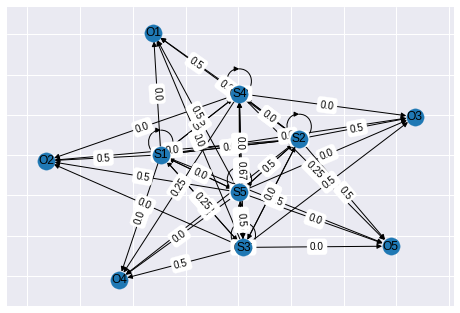

In [ ]:
# create graph object
G = nx.MultiDiGraph()

# nodes correspond to states
G.add_nodes_from(hidden_states)
print(f'Nodes:\n{G.nodes()}\n')

# edges represent hidden probabilities
for k, v in hide_edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)

# edges represent emission probabilities
for k, v in emit_edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
    
print(f'Edges:')
pprint(G.edges(data=True))    

pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='neato')
nx.draw_networkx(G, pos)

# create edge labels for jupyter plot but is not necessary
emit_edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G , pos, edge_labels=emit_edge_labels)
nx.drawing.nx_pydot.write_dot(G, 'pet_dog_hidden_markov.dot')

In [ ]:
def viterbi(pi, a, b, obs):
    
    nStates = np.shape(b)[0]
    T = np.shape(obs)[0]
    
    # init blank path
    path = np.zeros(T)
    # delta --> highest probability of any path that reaches state i
    delta = np.zeros((nStates, T))
    # phi --> argmax by time step for each state
    phi = np.zeros((nStates, T))
    
    # init delta and phi 
    delta[:, 0] = pi*b[:, obs[0]]
    phi[:, 0] = 0

    print('\nStart Walk Forward\n')    
    # the forward algorithm extension
    for t in range(1, T):
        for s in range(nStates):
            delta[s, t] = np.max(delta[:, t-1] * a[:, s]) * b[s, obs[t]] 
            phi[s, t] = np.argmax(delta[:, t-1] * a[:, s])
            print('s={s} and t={t}: phi[{s}, {t}] = {phi}'.format(s=s, t=t, phi=phi[s, t]))
    
    # find optimal path
    print('-'*50)
    print('Start Backtrace\n')
    path[T-1] = np.argmax(delta[:, T-1])
    #p('init path\n    t={} path[{}-1]={}\n'.format(T-1, T, path[T-1]))
    for t in range(T-2, -1, -1):
        #path[t] = phi[path[t+1], [t+1]]
        path[t] = phi[int(path[t+1]) , int(t+1)] 
        #p(' '*4 + 't={t}, path[{t}+1]={path}, [{t}+1]={i}'.format(t=t, path=path[t+1], i=[t+1]))
        print('path[{}] = {}'.format(t, path[t]))
        
    return path, delta, phi

path, delta, phi = viterbi(pi, a, b, obs)
print('\nsingle best state path: \n', path)
print('delta:\n', delta)
print('phi:\n', phi)


Start Walk Forward

s=0 and t=1: phi[0, 1] = 0.0
s=1 and t=1: phi[1, 1] = 1.0
s=2 and t=1: phi[2, 1] = 3.0
s=3 and t=1: phi[3, 1] = 0.0
s=4 and t=1: phi[4, 1] = 2.0
s=0 and t=2: phi[0, 2] = 0.0
s=1 and t=2: phi[1, 2] = 1.0
s=2 and t=2: phi[2, 2] = 2.0
s=3 and t=2: phi[3, 2] = 0.0
s=4 and t=2: phi[4, 2] = 2.0
s=0 and t=3: phi[0, 3] = 0.0
s=1 and t=3: phi[1, 3] = 1.0
s=2 and t=3: phi[2, 3] = 3.0
s=3 and t=3: phi[3, 3] = 0.0
s=4 and t=3: phi[4, 3] = 2.0
s=0 and t=4: phi[0, 4] = 0.0
s=1 and t=4: phi[1, 4] = 0.0
s=2 and t=4: phi[2, 4] = 3.0
s=3 and t=4: phi[3, 4] = 3.0
s=4 and t=4: phi[4, 4] = 0.0
s=0 and t=5: phi[0, 5] = 0.0
s=1 and t=5: phi[1, 5] = 0.0
s=2 and t=5: phi[2, 5] = 3.0
s=3 and t=5: phi[3, 5] = 3.0
s=4 and t=5: phi[4, 5] = 0.0
s=0 and t=6: phi[0, 6] = 2.0
s=1 and t=6: phi[1, 6] = 0.0
s=2 and t=6: phi[2, 6] = 2.0
s=3 and t=6: phi[3, 6] = 2.0
s=4 and t=6: phi[4, 6] = 2.0
s=0 and t=7: phi[0, 7] = 0.0
s=1 and t=7: phi[1, 7] = 4.0
s=2 and t=7: phi[2, 7] = 3.0
s=3 and t=7: phi[3, 7]

In [ ]:
state_map = {0:'S1', 1:'S2', 2:'S3', 3:'S4', 4:'S5'}
state_path = [state_map[v] for v in path]

(pd.DataFrame()
 .assign(Observation=obs_seq)
 .assign(Best_Path=state_path))

,Observation,Best_Path
0,O3,S1
1,O3,S1
2,O3,S1
3,O1,S4
4,O5,S4
5,O3,S3
6,O3,S1
7,O3,S4
8,O3,S3
9,O2,S5


# KECEPATAN ANGIN

In [ ]:
X = db['KecepatanAngin']
Y = db['Wisatawan']
S = np.zeros(14)
for i in range (0,14):
  S[i] = X[i+1]-X[i]
print(S)

[ 0.55  0.01  0.09 -0.29  0.02  0.45  0.52 -1.1   0.37  0.57 -0.97  0.17
  0.81 -0.61]


In [ ]:
Z = np.zeros(14)
for i in range (0,14):
  Z[i] = Y[i+1] - Y[i]
print(Z)

[ 1250722.  -524493.  -445158.   483562.   258567.  -306359.   576299.
  -211859.  -234271.   735996.  -134712. -1327158. -1519192.   604404.]


In [ ]:
#interval Wisatawan

for var in Z :
  if var > -1519193 and var <= -965210:
    print ('S1')
  elif var > -965210 and var <= -411227:
    print ('S2')
  elif var > -411227 and var <= 142756:
    print ('S3')
  elif var > 142756 and var <= 696739:
    print ('S4')
  elif var > 696739 and var <= 1250722:
    print ('S5')
  else :
    print ('not valid')

S5
S2
S2
S4
S4
S3
S4
S3
S3
S5
S3
S1
S1
S4


In [ ]:
 import pandas as pd
transitions = [ 'S5','S2','S2','S4','S4','S3','S4','S3','S3','S5','S3',
               'S1','S1','S4'] * 2

In [ ]:
df = pd.DataFrame (columns = [ 'state', 'next_state'])
for i , val in enumerate(transitions[ : -1 ] ) :
  df_stg = pd.DataFrame ( index =[0] )
  df_stg [ 'state' ], df_stg [ 'next_state'] = transitions [i] ,transitions [i+1]

df = pd.concat ([ df, df_stg ] , axis = 0 )
cross_tab = pd.crosstab( df['state'] , df['next_state'])
cross_tab.div ( cross_tab.sum(axis=1) , axis=0)

next_state,S4
state,
S1,1.0


In [ ]:
for var in S :
  if var > -1.15 and var <= -0.75:
    print ( 'O1')
  elif var > -0.75 and var <= -0.35 :
    print ( 'O2' )
  elif var > -0.35 and var <= 0.05:
    print ( 'O3' )
  elif var > 0.05 and var <= 0.45:
    print ( 'O4' )
  elif var > 0.45 and var <= 0.85:
    print ( 'O5' )
  else :
    print ( 'not valid ' )

O5
O3
O4
O3
O3
O5
O5
O1
O4
O5
O1
O4
O5
O2


In [ ]:
#probabilitas transisi variable terobservasi
import pandas as pd
transitions = ['O5','O3' , 'O4' , 'O3' , 'O3' , 'O5' , 'O5' , 'O1' ,
'O4' , 'O5' , 'O1' , 'O4' , 'O5' , 'O2' ] * 2


In [ ]:
df = pd.DataFrame (columns = [ 'state', 'next_state'])
for i , val in enumerate(transitions[ : -1 ] ) :
  df_stg = pd.DataFrame ( index =[0] )
  df_stg [ 'state' ], df_stg [ 'next_state'] = transitions [i] ,transitions [i+1]

df = pd.concat ([ df, df_stg ] , axis = 0 )
cross_tab = pd.crosstab( df['state'] , df['next_state'])
cross_tab.div ( cross_tab.sum(axis=1) , axis=0)

next_state,O2
state,
O5,1.0


In [ ]:
#prediksi pola variabel terhadap panen

#create state space and initial state probabilies
states = [ 'O1', 'O2' , 'O3' , 'O4', 'O5']
pi = [ 2/14 , 2/14 , 4/14, 4/14 , 2/14 ]
state_space = pd.Series ( pi , index = states , name='states' )
print ( state_space)
print ( state_space.sum( ) )


O1    0.142857
O2    0.142857
O3    0.285714
O4    0.285714
O5    0.142857
Name: states, dtype: float64
1.0


In [ ]:
#create transition matrix
#equals transition probability matrix of changing state given a state
#matrix is size (M x M) where M is number of states

#probabilitas transisi variabel terobervasi

q_df = pd.DataFrame ( columns=states , index=states )
q_df.loc[ states[0] ] = [ 0.0  , 0.0 , 0.0 , 1.0 , 0.0 ]
q_df.loc[ states[1] ] = [ 0.0  , 0.0 , 0.0 , 0.0  , 0.0  ]
q_df.loc[ states[2] ] = [ 0.0 , 0.0 , 0.33 , 0.67  , 0.0 ]
q_df.loc[ states[3] ] = [ 0.0  , 0.0 , 0.25  , 0.0  , 0.75  ]
q_df.loc[ states[4] ] = [ 0.5  , 0.25 , 0.25 , 0.0  , 0.0  ]
print ( q_df )


     O1    O2    O3    O4    O5
O1    0     0     0     1     0
O2    0     0     0     0     0
O3    0     0  0.33  0.67     0
O4    0     0  0.25     0  0.75
O5  0.5  0.25  0.25     0     0


In [ ]:
#create state space and initial state probabilities
hidden_states = [ 'S1' , 'S2' , 'S3' , 'S4', 'S5']
pi = [ 2/14 , 2/14 , 4/14, 4/14 , 2/14 ]
print ( '\n' )
state_space = pd.Series ( pi , index = hidden_states , name='states')
print (state_space)
print('\n')
print(state_space.sum())



S1    0.142857
S2    0.142857
S3    0.285714
S4    0.285714
S5    0.142857
Name: states, dtype: float64


1.0


In [ ]:
#create hidden transition matrix
#a or alpha = transition probability matrix of changing states given a state
#matrix is size (M x M) where M is number of states

a_df = pd.DataFrame(columns = hidden_states , index=hidden_states )
a_df.loc[ hidden_states[ 0 ] ] = [ 0.5 , 0.0 , 0.0 , 0.5 , 0.0 ]
a_df.loc[ hidden_states[ 1 ] ] = [ 0.0 , 0.5 , 0.0 , 0.5 , 0.0 ]
a_df.loc[ hidden_states[ 2 ] ] = [ 0.25 , 0.0 , 0.25 , 0.25, 0.25 ]
a_df.loc[ hidden_states[ 3 ] ] = [ 0.0 , 0.0 , 0.67 , 0.33 , 0.0 ]
a_df.loc[ hidden_states[ 4 ] ] = [ 0.0 , 0.5 , 0.5 , 0.0 , 0.0 ]
print ( a_df )


      S1   S2    S3    S4    S5
S1   0.5    0     0   0.5     0
S2     0  0.5     0   0.5     0
S3  0.25    0  0.25  0.25  0.25
S4     0    0  0.67  0.33     0
S5     0  0.5   0.5     0     0


In [ ]:
a = a_df.values
print ( a )
print ( '\n')
print ( a.shape )
print ( '\n ')
print ( a_df.sum( axis = 1))


[[0.5 0.0 0.0 0.5 0.0]
 [0.0 0.5 0.0 0.5 0.0]
 [0.25 0.0 0.25 0.25 0.25]
 [0.0 0.0 0.67 0.33 0.0]
 [0.0 0.5 0.5 0.0 0.0]]


(5, 5)

 
S1    1.0
S2    1.0
S3    1.0
S4    1.0
S5    1.0
dtype: float64


In [ ]:
#create matrix of observation (emission) probabilities
#b or beta = observation probabilities given state
#matrix is size (M x O) where M is number of states
# and O is number of different possible observations

observable_states = states
b_df = pd.DataFrame(columns = observable_states , index=hidden_states )
b_df.loc[ hidden_states[ 0 ] ] = [ 0.0 , 0.0 , 0.0 , 0.5 , 0.5 ]
b_df.loc[ hidden_states[ 1 ] ] = [ 0.0 , 0.0 , 0.5 , 0.5 , 0.0 ]
b_df.loc[ hidden_states[ 2 ] ] = [ 0.5 , 0.0 , 0.0 , 0.5 , 0.0 ]
b_df.loc[ hidden_states[ 3 ] ] = [ 0.0 , 0.25 , 0.5 , 0.0 , 0.25 ]
b_df.loc[ hidden_states[ 4 ] ] = [ 0.0 , 0.0 , 0.0 , 0.0 , 1.0 ]
print ( b_df )


     O1    O2   O3   O4    O5
S1    0     0    0  0.5   0.5
S2    0     0  0.5  0.5     0
S3  0.5     0    0  0.5     0
S4    0  0.25  0.5    0  0.25
S5    0     0    0    0     1


In [ ]:
b = b_df.values

print ( b )
print( '\n' )
print ( b.shape )
print ( '\n' )
print ( b_df.sum( axis = 1))


[[0.0 0.0 0.0 0.5 0.5]
 [0.0 0.0 0.5 0.5 0.0]
 [0.5 0.0 0.0 0.5 0.0]
 [0.0 0.25 0.5 0.0 0.25]
 [0.0 0.0 0.0 0.0 1.0]]


(5, 5)


S1    1.0
S2    1.0
S3    1.0
S4    1.0
S5    1.0
dtype: float64


In [ ]:
#create edge labels
#emit_edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data = True)}
#nx.draw_networkx_edge_labels(G, pos, edge_labels = emit_edge_labels)
#plt .show()
#nx.drawing.nx_pydot.write dot(G, 'hidden markov.dot')

# observation sequence of dog's behaviors 
# observations are encoded numerically

obs_map = {'O1':0, 'O2':1, 'O3':2, 'O4':3, 'O5':4}
obs = np.array([4, 2, 3, 2, 2, 3, 4, 0, 3, 4, 0, 3, 4, 1])

inv_obs_map = dict((v,k) for k, v in obs_map.items())
obs_seq = [inv_obs_map[v] for v in list(obs)]

print(pd.DataFrame(np.column_stack([obs, obs_seq]),
                   columns = ['Obs_code', 'Obs_seq']))



   Obs_code Obs_seq
0         4      O5
1         2      O3
2         3      O4
3         2      O3
4         2      O3
5         3      O4
6         4      O5
7         0      O1
8         3      O4
9         4      O5
10        0      O1
11        3      O4
12        4      O5
13        1      O2


Nodes:
['S1', 'S2', 'S3', 'S4', 'S5']

Edges:
OutMultiEdgeDataView([('S1', 'S1', {'weight': 0.5, 'label': 0.5}), ('S1', 'S2', {'weight': 0.0, 'label': 0.0}), ('S1', 'S3', {'weight': 0.0, 'label': 0.0}), ('S1', 'S4', {'weight': 0.5, 'label': 0.5}), ('S1', 'S5', {'weight': 0.0, 'label': 0.0}), ('S1', 'O1', {'weight': 0.0, 'label': 0.0}), ('S1', 'O2', {'weight': 0.5, 'label': 0.5}), ('S1', 'O3', {'weight': 0.0, 'label': 0.0}), ('S1', 'O4', {'weight': 0.0, 'label': 0.0}), ('S1', 'O5', {'weight': 0.5, 'label': 0.5}), ('S2', 'S1', {'weight': 0.0, 'label': 0.0}), ('S2', 'S2', {'weight': 0.5, 'label': 0.5}), ('S2', 'S3', {'weight': 0.0, 'label': 0.0}), ('S2', 'S4', {'weight': 0.5, 'label': 0.5}), ('S2', 'S5', {'weight': 0.0, 'label': 0.0}), ('S2', 'O1', {'weight': 0.0, 'label': 0.0}), ('S2', 'O2', {'weight': 0.0, 'label': 0.0}), ('S2', 'O3', {'weight': 0.5, 'label': 0.5}), ('S2', 'O4', {'weight': 0.0, 'label': 0.0}), ('S2', 'O5', {'weight': 0.5, 'label': 0.5}), ('S3', 'S1', {'weight': 0.25, 'l

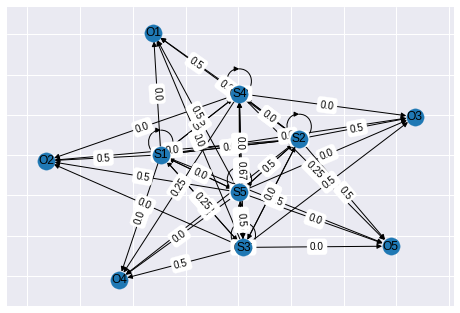

In [ ]:
# create graph object
G = nx.MultiDiGraph()

# nodes correspond to states
G.add_nodes_from(hidden_states)
print(f'Nodes:\n{G.nodes()}\n')

# edges represent hidden probabilities
for k, v in hide_edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)

# edges represent emission probabilities
for k, v in emit_edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
    
print(f'Edges:')
pprint(G.edges(data=True))    

pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='neato')
nx.draw_networkx(G, pos)

# create edge labels for jupyter plot but is not necessary
emit_edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G , pos, edge_labels=emit_edge_labels)
nx.drawing.nx_pydot.write_dot(G, 'pet_dog_hidden_markov.dot')

In [ ]:
def viterbi(pi, a, b, obs):
    
    nStates = np.shape(b)[0]
    T = np.shape(obs)[0]
    
    # init blank path
    path = np.zeros(T)
    # delta --> highest probability of any path that reaches state i
    delta = np.zeros((nStates, T))
    # phi --> argmax by time step for each state
    phi = np.zeros((nStates, T))
    
    # init delta and phi 
    delta[:, 0] = pi*b[:, obs[0]]
    phi[:, 0] = 0

    print('\nStart Walk Forward\n')    
    # the forward algorithm extension
    for t in range(1, T):
        for s in range(nStates):
            delta[s, t] = np.max(delta[:, t-1] * a[:, s]) * b[s, obs[t]] 
            phi[s, t] = np.argmax(delta[:, t-1] * a[:, s])
            print('s={s} and t={t}: phi[{s}, {t}] = {phi}'.format(s=s, t=t, phi=phi[s, t]))
    
    # find optimal path
    print('-'*50)
    print('Start Backtrace\n')
    path[T-1] = np.argmax(delta[:, T-1])
    #p('init path\n    t={} path[{}-1]={}\n'.format(T-1, T, path[T-1]))
    for t in range(T-2, -1, -1):
        #path[t] = phi[path[t+1], [t+1]]
        path[t] = phi[int(path[t+1]) , int(t+1)] 
        #p(' '*4 + 't={t}, path[{t}+1]={path}, [{t}+1]={i}'.format(t=t, path=path[t+1], i=[t+1]))
        print('path[{}] = {}'.format(t, path[t]))
        
    return path, delta, phi

path, delta, phi = viterbi(pi, a, b, obs)
print('\nsingle best state path: \n', path)
print('delta:\n', delta)
print('phi:\n', phi)


Start Walk Forward

s=0 and t=1: phi[0, 1] = 0.0
s=1 and t=1: phi[1, 1] = 4.0
s=2 and t=1: phi[2, 1] = 4.0
s=3 and t=1: phi[3, 1] = 0.0
s=4 and t=1: phi[4, 1] = 0.0
s=0 and t=2: phi[0, 2] = 0.0
s=1 and t=2: phi[1, 2] = 1.0
s=2 and t=2: phi[2, 2] = 3.0
s=3 and t=2: phi[3, 2] = 1.0
s=4 and t=2: phi[4, 2] = 0.0
s=0 and t=3: phi[0, 3] = 2.0
s=1 and t=3: phi[1, 3] = 1.0
s=2 and t=3: phi[2, 3] = 2.0
s=3 and t=3: phi[3, 3] = 1.0
s=4 and t=3: phi[4, 3] = 2.0
s=0 and t=4: phi[0, 4] = 0.0
s=1 and t=4: phi[1, 4] = 1.0
s=2 and t=4: phi[2, 4] = 3.0
s=3 and t=4: phi[3, 4] = 1.0
s=4 and t=4: phi[4, 4] = 0.0
s=0 and t=5: phi[0, 5] = 0.0
s=1 and t=5: phi[1, 5] = 1.0
s=2 and t=5: phi[2, 5] = 3.0
s=3 and t=5: phi[3, 5] = 1.0
s=4 and t=5: phi[4, 5] = 0.0
s=0 and t=6: phi[0, 6] = 2.0
s=1 and t=6: phi[1, 6] = 1.0
s=2 and t=6: phi[2, 6] = 2.0
s=3 and t=6: phi[3, 6] = 1.0
s=4 and t=6: phi[4, 6] = 2.0
s=0 and t=7: phi[0, 7] = 0.0
s=1 and t=7: phi[1, 7] = 4.0
s=2 and t=7: phi[2, 7] = 4.0
s=3 and t=7: phi[3, 7]

In [ ]:
state_map = {0:'S1', 1:'S2', 2:'S3', 3:'S4', 4:'S5'}
state_path = [state_map[v] for v in path]

(pd.DataFrame()
 .assign(Observation=obs_seq)
 .assign(Best_Path=state_path))

,Observation,Best_Path
0,O5,S5
1,O3,S2
2,O4,S2
3,O3,S2
4,O3,S4
5,O4,S3
6,O5,S5
7,O1,S3
8,O4,S3
9,O5,S5


#LAMA PENYINARAN MATAHARI

In [ ]:
X = db['PenyinaranMatahari']
Y = db['Wisatawan']
S = np.zeros(14)
for i in range (0,14):
  S[i] = X[i+1]-X[i]
print(S)

[ 0.71 -1.31 -0.49 -0.86  0.87  0.83  0.74  0.27 -1.25  1.9   0.95 -2.24
  0.71 -0.89]


In [ ]:
Z = np.zeros(14)
for i in range (0,14):
  Z[i] = Y[i+1] - Y[i]
print(Z)

[ 1250722.  -524493.  -445158.   483562.   258567.  -306359.   576299.
  -211859.  -234271.   735996.  -134712. -1327158. -1519192.   604404.]


In [ ]:
#interval Wisatawan

for var in Z :
  if var > -1519193 and var <= -965210:
    print ('S1')
  elif var > -965210 and var <= -411227:
    print ('S2')
  elif var > -411227 and var <= 142756:
    print ('S3')
  elif var > 142756 and var <= 696739:
    print ('S4')
  elif var > 696739 and var <= 1250722:
    print ('S5')
  else :
    print ('not valid')

S5
S2
S2
S4
S4
S3
S4
S3
S3
S5
S3
S1
S1
S4


In [ ]:
 import pandas as pd
transitions = [ 'S5','S2','S2','S4','S4','S3','S4','S3','S3','S5','S3',
               'S1','S1','S4'] * 2

In [ ]:
df = pd.DataFrame (columns = [ 'state', 'next_state'])
for i , val in enumerate(transitions[ : -1 ] ) :
  df_stg = pd.DataFrame ( index =[0] )
  df_stg [ 'state' ], df_stg [ 'next_state'] = transitions [i] ,transitions [i+1]

df = pd.concat ([ df, df_stg ] , axis = 0 )
cross_tab = pd.crosstab( df['state'] , df['next_state'])
cross_tab.div ( cross_tab.sum(axis=1) , axis=0)

next_state,S4
state,
S1,1.0


In [ ]:
for var in S :
  if var > -3 and var <= -2:
    print ( 'O1')
  elif var > -2 and var <= -1 :
    print ( 'O2' )
  elif var > -1 and var <= 0:
    print ( 'O3' )
  elif var > 0 and var <= 1:
    print ( 'O4' )
  elif var > 1 and var <= 2:
    print ( 'O5' )
  else :
    print ( 'not valid ' )

O4
O2
O3
O3
O4
O4
O4
O4
O2
O5
O4
O1
O4
O3


In [ ]:
#probabilitas transisi variable terobservasi
import pandas as pd
transitions = ['O4','O2' , 'O3' , 'O3' , 'O4' , 'O4' , 'O4' , 'O4' ,
'O2' , 'O5' , 'O4' , 'O1' , 'O4' , 'O3' ] * 2


In [ ]:
df = pd.DataFrame (columns = [ 'state', 'next_state'])
for i , val in enumerate(transitions[ : -1 ] ) :
  df_stg = pd.DataFrame ( index =[0] )
  df_stg [ 'state' ], df_stg [ 'next_state'] = transitions [i] ,transitions [i+1]

df = pd.concat ([ df, df_stg ] , axis = 0 )
cross_tab = pd.crosstab( df['state'] , df['next_state'])
cross_tab.div ( cross_tab.sum(axis=1) , axis=0)

next_state,O3
state,
O4,1.0


In [ ]:
#prediksi pola variabel terhadap panen

#create state space and initial state probabilies
states = [ 'O1', 'O2' , 'O3' , 'O4', 'O5']
pi = [ 2/14 , 2/14 , 4/14, 4/14 , 2/14 ]
state_space = pd.Series ( pi , index = states , name='states' )
print ( state_space)
print ( state_space.sum( ) )


O1    0.142857
O2    0.142857
O3    0.285714
O4    0.285714
O5    0.142857
Name: states, dtype: float64
1.0


In [ ]:
#create transition matrix
#equals transition probability matrix of changing state given a state
#matrix is size (M x M) where M is number of states

#probabilitas transisi variabel terobervasi

q_df = pd.DataFrame ( columns=states , index=states )
q_df.loc[ states[0] ] = [ 0.0  , 0.0 , 0.0 , 1.0 , 0.0 ]
q_df.loc[ states[1] ] = [ 0.0  , 0.0 , 0.5 , 0.0 , 0.5 ]
q_df.loc[ states[2] ] = [ 0.0 , 0.0 , 0.5 , 0.5  , 0.0 ]
q_df.loc[ states[3] ] = [ 0.143  , 0.286 , 0.143  , 0.429  , 0.0  ]
q_df.loc[ states[4] ] = [ 0.0  , 0.0 , 0.0 , 1.0  , 0.0  ]
print ( q_df )


       O1     O2     O3     O4   O5
O1      0      0      0      1    0
O2      0      0    0.5      0  0.5
O3      0      0    0.5    0.5    0
O4  0.143  0.286  0.143  0.429    0
O5      0      0      0      1    0


In [ ]:
#create state space and initial state probabilities
hidden_states = [ 'S1' , 'S2' , 'S3' , 'S4', 'S5']
pi = [ 2/14 , 2/14 , 4/14, 4/14 , 2/14 ]
print ( '\n' )
state_space = pd.Series ( pi , index = hidden_states , name='states')
print (state_space)
print('\n')
print(state_space.sum())



S1    0.142857
S2    0.142857
S3    0.285714
S4    0.285714
S5    0.142857
Name: states, dtype: float64


1.0


In [ ]:
#create hidden transition matrix
#a or alpha = transition probability matrix of changing states given a state
#matrix is size (M x M) where M is number of states

a_df = pd.DataFrame(columns = hidden_states , index=hidden_states )
a_df.loc[ hidden_states[ 0 ] ] = [ 0.5 , 0.0 , 0.0 , 0.5 , 0.0 ]
a_df.loc[ hidden_states[ 1 ] ] = [ 0.0 , 0.5 , 0.0 , 0.5 , 0.0 ]
a_df.loc[ hidden_states[ 2 ] ] = [ 0.25 , 0.0 , 0.25 , 0.25, 0.25 ]
a_df.loc[ hidden_states[ 3 ] ] = [ 0.0 , 0.0 , 0.67 , 0.33 , 0.0 ]
a_df.loc[ hidden_states[ 4 ] ] = [ 0.0 , 0.5 , 0.5 , 0.0 , 0.0 ]
print ( a_df )


      S1   S2    S3    S4    S5
S1   0.5    0     0   0.5     0
S2     0  0.5     0   0.5     0
S3  0.25    0  0.25  0.25  0.25
S4     0    0  0.67  0.33     0
S5     0  0.5   0.5     0     0


In [ ]:
a = a_df.values
print ( a )
print ( '\n')
print ( a.shape )
print ( '\n ')
print ( a_df.sum( axis = 1))


[[0.5 0.0 0.0 0.5 0.0]
 [0.0 0.5 0.0 0.5 0.0]
 [0.25 0.0 0.25 0.25 0.25]
 [0.0 0.0 0.67 0.33 0.0]
 [0.0 0.5 0.5 0.0 0.0]]


(5, 5)

 
S1    1.0
S2    1.0
S3    1.0
S4    1.0
S5    1.0
dtype: float64


In [ ]:
#create matrix of observation (emission) probabilities
#b or beta = observation probabilities given state
#matrix is size (M x O) where M is number of states
# and O is number of different possible observations

observable_states = states
b_df = pd.DataFrame(columns = observable_states , index=hidden_states )
b_df.loc[ hidden_states[ 0 ] ] = [ 0.5 , 0.0 , 0.0 , 0.5 , 0.0 ]
b_df.loc[ hidden_states[ 1 ] ] = [ 0.0 , 0.5 , 0.5 , 0.0 , 0.0 ]
b_df.loc[ hidden_states[ 2 ] ] = [ 0.0 , 0.25 , 0.0 , 0.75 , 0.0 ]
b_df.loc[ hidden_states[ 3 ] ] = [ 0.0 , 0.0 , 0.5 , 0.5 , 0.0 ]
b_df.loc[ hidden_states[ 4 ] ] = [ 0.0 , 0.0 , 0.0 , 0.5 , 0.5 ]
print ( b_df )


     O1    O2   O3    O4   O5
S1  0.5     0    0   0.5    0
S2    0   0.5  0.5     0    0
S3    0  0.25    0  0.75    0
S4    0     0  0.5   0.5    0
S5    0     0    0   0.5  0.5


In [ ]:
b = b_df.values

print ( b )
print( '\n' )
print ( b.shape )
print ( '\n' )
print ( b_df.sum( axis = 1))


[[0.5 0.0 0.0 0.5 0.0]
 [0.0 0.5 0.5 0.0 0.0]
 [0.0 0.25 0.0 0.75 0.0]
 [0.0 0.0 0.5 0.5 0.0]
 [0.0 0.0 0.0 0.5 0.5]]


(5, 5)


S1    1.0
S2    1.0
S3    1.0
S4    1.0
S5    1.0
dtype: float64


In [ ]:
#create edge labels
#emit_edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data = True)}
#nx.draw_networkx_edge_labels(G, pos, edge_labels = emit_edge_labels)
#plt .show()
#nx.drawing.nx_pydot.write dot(G, 'hidden markov.dot')

# observation sequence of dog's behaviors 
# observations are encoded numerically

obs_map = {'O1':0, 'O2':1, 'O3':2, 'O4':3, 'O5':4}
obs = np.array([2, 2, 2, 0, 4, 2, 2, 2, 2, 1, 3, 2, 2, 2])

inv_obs_map = dict((v,k) for k, v in obs_map.items())
obs_seq = [inv_obs_map[v] for v in list(obs)]

print(pd.DataFrame(np.column_stack([obs, obs_seq]),
                   columns = ['Obs_code', 'Obs_seq']))



   Obs_code Obs_seq
0         2      O3
1         2      O3
2         2      O3
3         0      O1
4         4      O5
5         2      O3
6         2      O3
7         2      O3
8         2      O3
9         1      O2
10        3      O4
11        2      O3
12        2      O3
13        2      O3


Nodes:
['S1', 'S2', 'S3', 'S4', 'S5']

Edges:
OutMultiEdgeDataView([('S1', 'S1', {'weight': 0.5, 'label': 0.5}), ('S1', 'S2', {'weight': 0.0, 'label': 0.0}), ('S1', 'S3', {'weight': 0.0, 'label': 0.0}), ('S1', 'S4', {'weight': 0.5, 'label': 0.5}), ('S1', 'S5', {'weight': 0.0, 'label': 0.0}), ('S1', 'O1', {'weight': 0.0, 'label': 0.0}), ('S1', 'O2', {'weight': 0.5, 'label': 0.5}), ('S1', 'O3', {'weight': 0.0, 'label': 0.0}), ('S1', 'O4', {'weight': 0.0, 'label': 0.0}), ('S1', 'O5', {'weight': 0.5, 'label': 0.5}), ('S2', 'S1', {'weight': 0.0, 'label': 0.0}), ('S2', 'S2', {'weight': 0.5, 'label': 0.5}), ('S2', 'S3', {'weight': 0.0, 'label': 0.0}), ('S2', 'S4', {'weight': 0.5, 'label': 0.5}), ('S2', 'S5', {'weight': 0.0, 'label': 0.0}), ('S2', 'O1', {'weight': 0.0, 'label': 0.0}), ('S2', 'O2', {'weight': 0.0, 'label': 0.0}), ('S2', 'O3', {'weight': 0.5, 'label': 0.5}), ('S2', 'O4', {'weight': 0.0, 'label': 0.0}), ('S2', 'O5', {'weight': 0.5, 'label': 0.5}), ('S3', 'S1', {'weight': 0.25, 'l

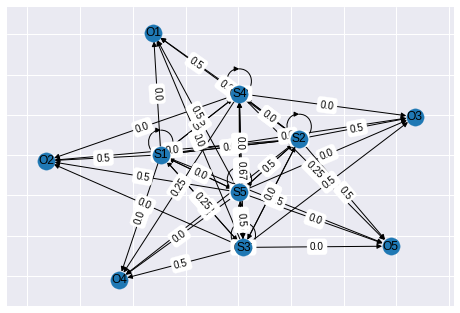

In [ ]:
# create graph object
G = nx.MultiDiGraph()

# nodes correspond to states
G.add_nodes_from(hidden_states)
print(f'Nodes:\n{G.nodes()}\n')

# edges represent hidden probabilities
for k, v in hide_edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)

# edges represent emission probabilities
for k, v in emit_edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
    
print(f'Edges:')
pprint(G.edges(data=True))    

pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='neato')
nx.draw_networkx(G, pos)

# create edge labels for jupyter plot but is not necessary
emit_edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G , pos, edge_labels=emit_edge_labels)
nx.drawing.nx_pydot.write_dot(G, 'pet_dog_hidden_markov.dot')

In [ ]:
def viterbi(pi, a, b, obs):
    
    nStates = np.shape(b)[0]
    T = np.shape(obs)[0]
    
    # init blank path
    path = np.zeros(T)
    # delta --> highest probability of any path that reaches state i
    delta = np.zeros((nStates, T))
    # phi --> argmax by time step for each state
    phi = np.zeros((nStates, T))
    
    # init delta and phi 
    delta[:, 0] = pi*b[:, obs[0]]
    phi[:, 0] = 0

    print('\nStart Walk Forward\n')    
    # the forward algorithm extension
    for t in range(1, T):
        for s in range(nStates):
            delta[s, t] = np.max(delta[:, t-1] * a[:, s]) * b[s, obs[t]] 
            phi[s, t] = np.argmax(delta[:, t-1] * a[:, s])
            print('s={s} and t={t}: phi[{s}, {t}] = {phi}'.format(s=s, t=t, phi=phi[s, t]))
    
    # find optimal path
    print('-'*50)
    print('Start Backtrace\n')
    path[T-1] = np.argmax(delta[:, T-1])
    #p('init path\n    t={} path[{}-1]={}\n'.format(T-1, T, path[T-1]))
    for t in range(T-2, -1, -1):
        #path[t] = phi[path[t+1], [t+1]]
        path[t] = phi[int(path[t+1]) , int(t+1)] 
        #p(' '*4 + 't={t}, path[{t}+1]={path}, [{t}+1]={i}'.format(t=t, path=path[t+1], i=[t+1]))
        print('path[{}] = {}'.format(t, path[t]))
        
    return path, delta, phi

path, delta, phi = viterbi(pi, a, b, obs)
print('\nsingle best state path: \n', path)
print('delta:\n', delta)
print('phi:\n', phi)


Start Walk Forward

s=0 and t=1: phi[0, 1] = 0.0
s=1 and t=1: phi[1, 1] = 1.0
s=2 and t=1: phi[2, 1] = 3.0
s=3 and t=1: phi[3, 1] = 3.0
s=4 and t=1: phi[4, 1] = 0.0
s=0 and t=2: phi[0, 2] = 0.0
s=1 and t=2: phi[1, 2] = 1.0
s=2 and t=2: phi[2, 2] = 3.0
s=3 and t=2: phi[3, 2] = 1.0
s=4 and t=2: phi[4, 2] = 0.0
s=0 and t=3: phi[0, 3] = 0.0
s=1 and t=3: phi[1, 3] = 1.0
s=2 and t=3: phi[2, 3] = 3.0
s=3 and t=3: phi[3, 3] = 1.0
s=4 and t=3: phi[4, 3] = 0.0
s=0 and t=4: phi[0, 4] = 0.0
s=1 and t=4: phi[1, 4] = 0.0
s=2 and t=4: phi[2, 4] = 0.0
s=3 and t=4: phi[3, 4] = 0.0
s=4 and t=4: phi[4, 4] = 0.0
s=0 and t=5: phi[0, 5] = 0.0
s=1 and t=5: phi[1, 5] = 0.0
s=2 and t=5: phi[2, 5] = 0.0
s=3 and t=5: phi[3, 5] = 0.0
s=4 and t=5: phi[4, 5] = 0.0
s=0 and t=6: phi[0, 6] = 0.0
s=1 and t=6: phi[1, 6] = 0.0
s=2 and t=6: phi[2, 6] = 0.0
s=3 and t=6: phi[3, 6] = 0.0
s=4 and t=6: phi[4, 6] = 0.0
s=0 and t=7: phi[0, 7] = 0.0
s=1 and t=7: phi[1, 7] = 0.0
s=2 and t=7: phi[2, 7] = 0.0
s=3 and t=7: phi[3, 7]

In [ ]:
state_map = {0:'S1', 1:'S2', 2:'S3', 3:'S4', 4:'S5'}
state_path = [state_map[v] for v in path]

(pd.DataFrame()
 .assign(Observation=obs_seq)
 .assign(Best_Path=state_path))

,Observation,Best_Path
0,O3,S1
1,O3,S1
2,O3,S1
3,O1,S1
4,O5,S1
5,O3,S1
6,O3,S1
7,O3,S1
8,O3,S1
9,O2,S1
